 Dataset Loaded Successfully!

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

 Model Performance Comparison:

                   R² Score       MAE      RMSE
Linear Regression  0.599702  2.036517  3.036625
Random Forest      0.964457  0.599181  0.904848

 Best Model: Random Forest


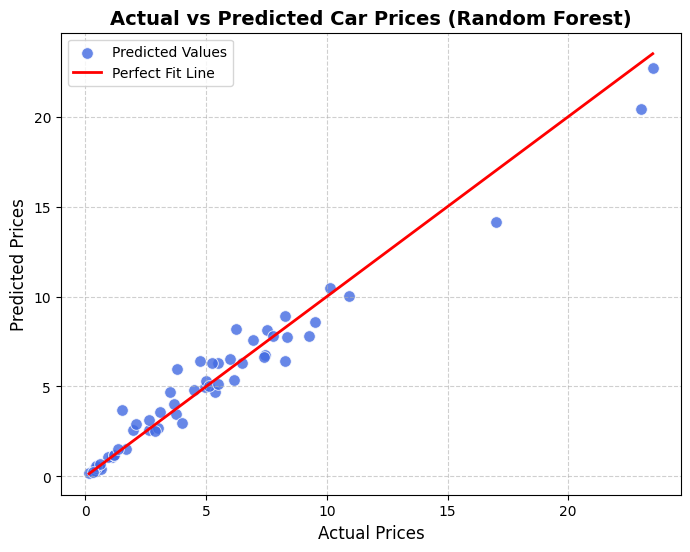

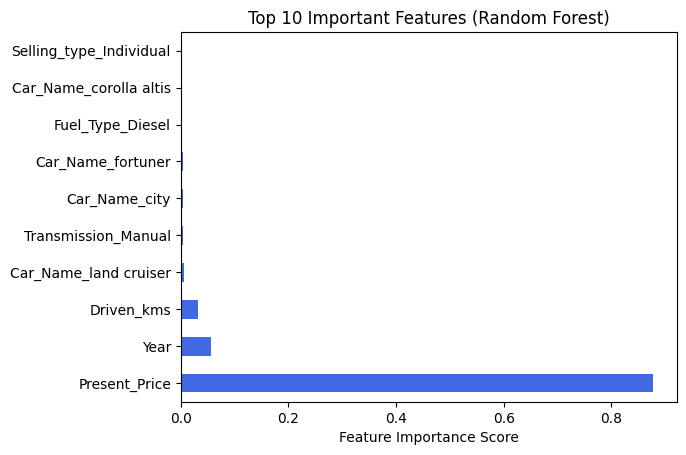

In [4]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

df = pd.read_csv("car_data.csv")
print(" Dataset Loaded Successfully!\n")
print(df.head())

# Convert categorical features into numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Define features (X) and target (y)
X = df.drop("Selling_Price", axis=1)
y = df["Selling_Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = [r2, mae, rmse]


results_df = pd.DataFrame(results, index=["R² Score", "MAE", "RMSE"]).T
print("\n Model Performance Comparison:\n")
print(results_df)

best_model_name = results_df["R² Score"].idxmax()
print(f"\n Best Model: {best_model_name}")

best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_best, color="royalBlue", s=70, alpha=0.8, label="Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2, label="Perfect Fit Line")
plt.xlabel("Actual Prices", fontsize=12)
plt.ylabel("Predicted Prices", fontsize=12)
plt.title(f"Actual vs Predicted Car Prices ({best_model_name})", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Feature Importance For Random Forest
if best_model_name == "Random Forest":
    importance = pd.Series(best_model.feature_importances_, index=X.columns)
    importance.nlargest(10).plot(kind='barh', color='royalblue')
    plt.title("Top 10 Important Features (Random Forest)")
    plt.xlabel("Feature Importance Score")
    plt.show()


